In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

### EDA

In [2]:
data=pd.read_csv('data/xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
data.shape

(480, 17)

In [4]:
data.size

8160

In [5]:
data.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(2)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [10]:
# Encode categorical features (if any)
label_encoder = LabelEncoder()

# Encoding categorical columns
data['gender'] = label_encoder.fit_transform(data['gender'])
data['NationalITy'] = label_encoder.fit_transform(data['NationalITy'])
data['PlaceofBirth'] = label_encoder.fit_transform(data['PlaceofBirth'])
data['StageID'] = label_encoder.fit_transform(data['StageID'])
data['GradeID'] = label_encoder.fit_transform(data['GradeID'])
data['SectionID'] = label_encoder.fit_transform(data['SectionID'])
data['Topic'] = label_encoder.fit_transform(data['Topic'])
data['Semester'] = label_encoder.fit_transform(data['Semester'])
data['Relation'] = label_encoder.fit_transform(data['Relation'])
data['ParentAnsweringSurvey'] = label_encoder.fit_transform(data['ParentAnsweringSurvey'])
data['ParentschoolSatisfaction'] = label_encoder.fit_transform(data['ParentschoolSatisfaction'])
data['Class'] = label_encoder.fit_transform(data['Class'])
data['StudentAbsenceDays'] = label_encoder.fit_transform(data['StudentAbsenceDays'])

In [11]:
data.dtypes

gender                      int64
NationalITy                 int64
PlaceofBirth                int64
StageID                     int64
GradeID                     int64
SectionID                   int64
Topic                       int64
Semester                    int64
Relation                    int64
raisedhands                 int64
VisITedResources            int64
AnnouncementsView           int64
Discussion                  int64
ParentAnsweringSurvey       int64
ParentschoolSatisfaction    int64
StudentAbsenceDays          int64
Class                       int64
dtype: object

In [12]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


### Outlier Detection

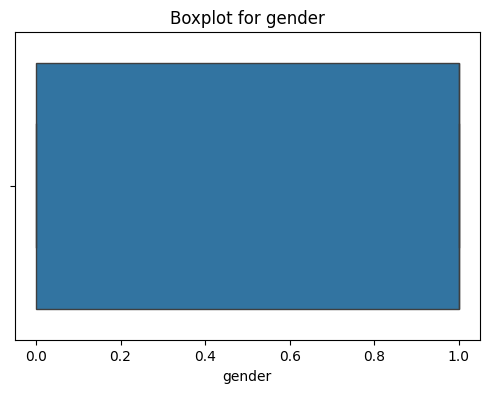

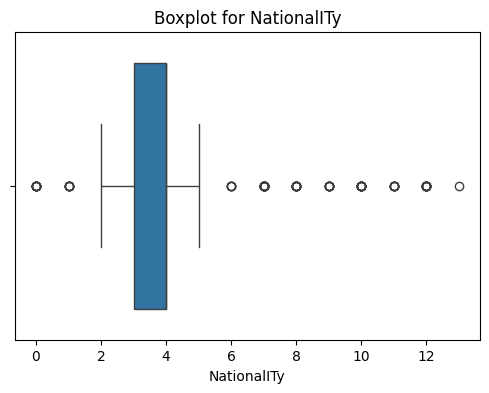

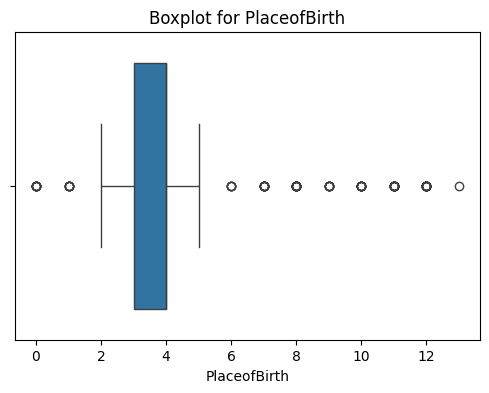

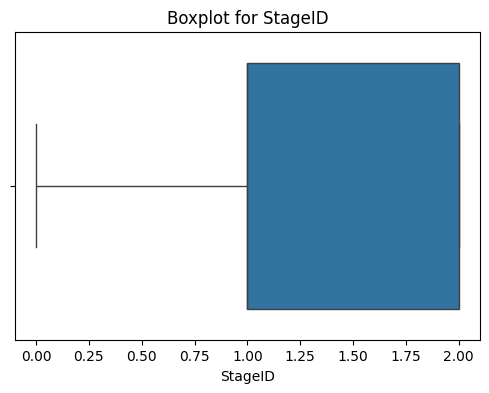

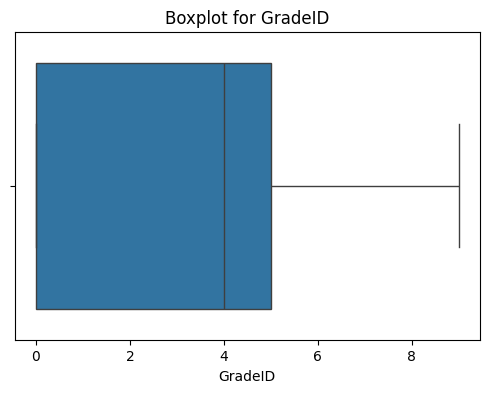

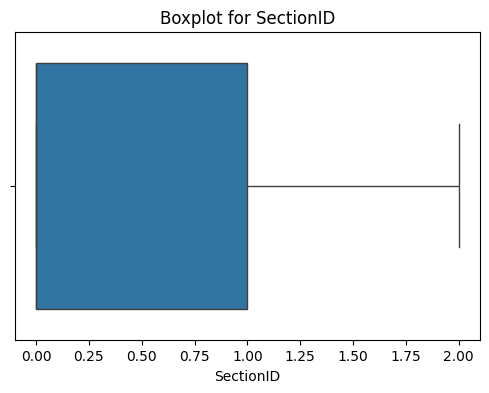

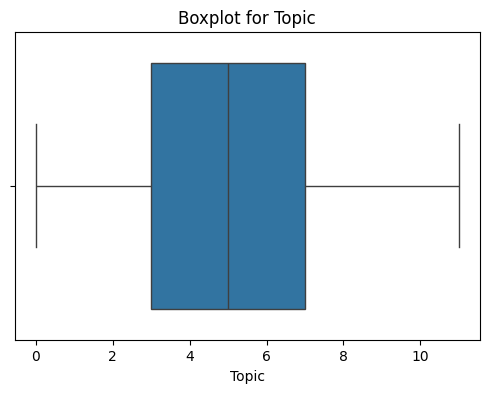

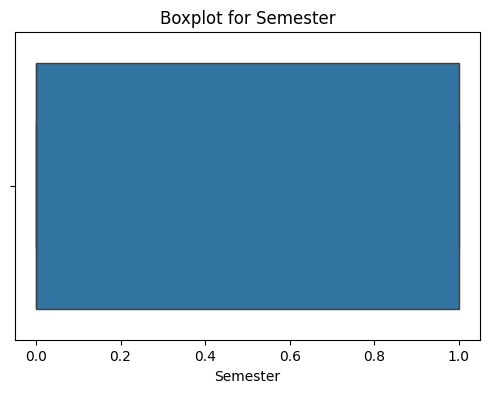

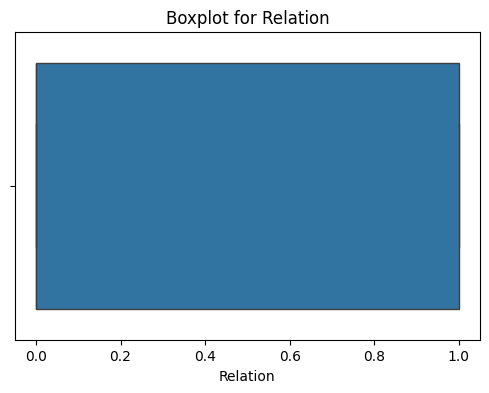

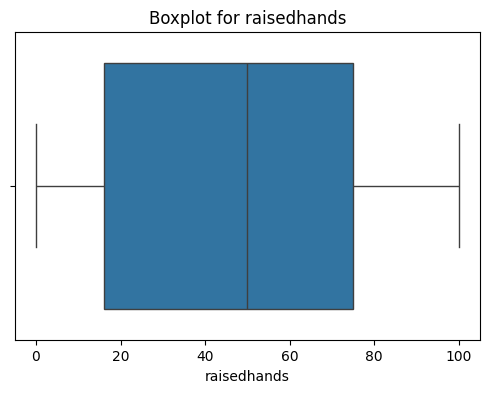

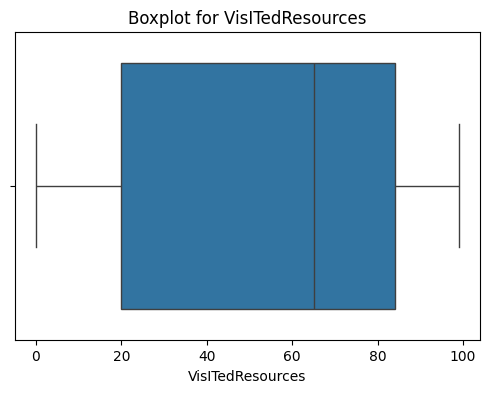

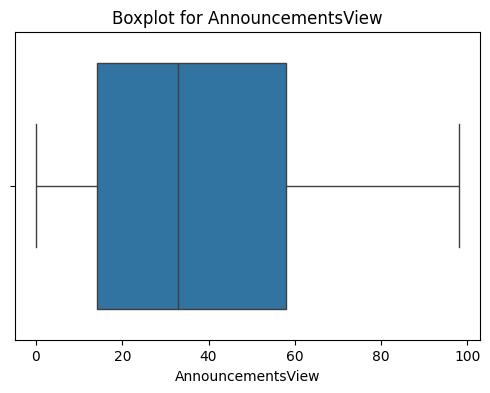

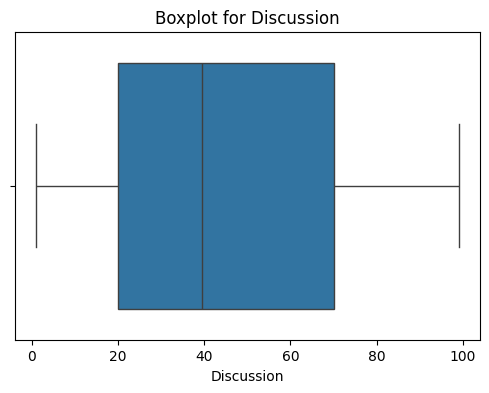

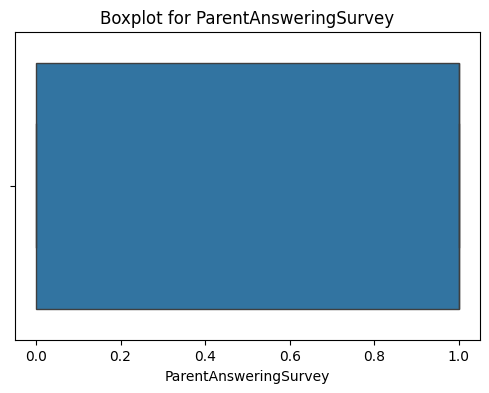

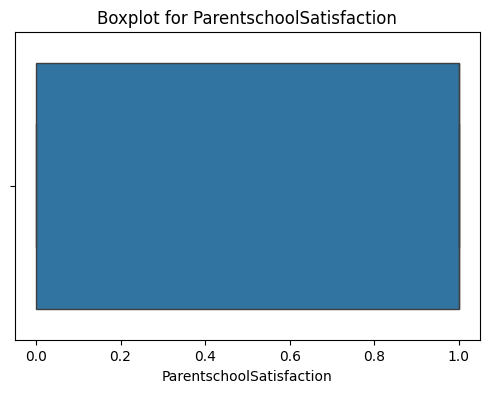

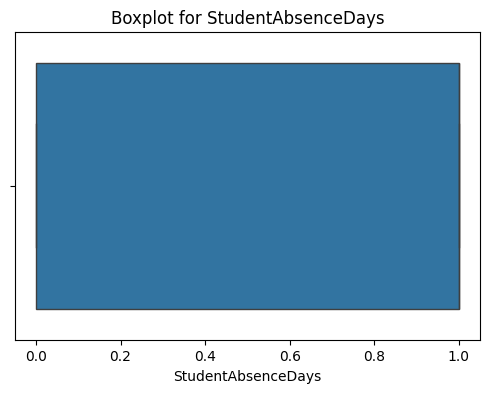

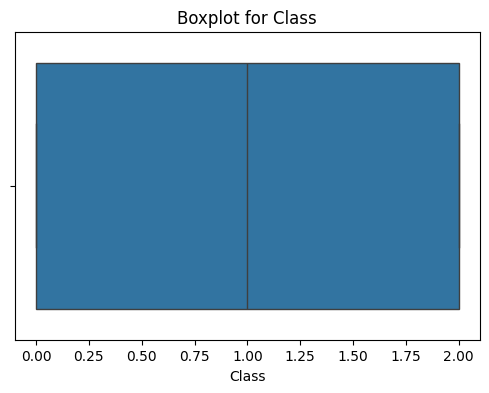

In [13]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [14]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1          4.0           4.0        2        1          0      7   
1       1          4.0           4.0        2        1          0      7   
2       1          4.0           4.0        2        1          0      7   
3       1          4.0           4.0        2        1          0      7   
4       1          4.0           4.0        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0          20             

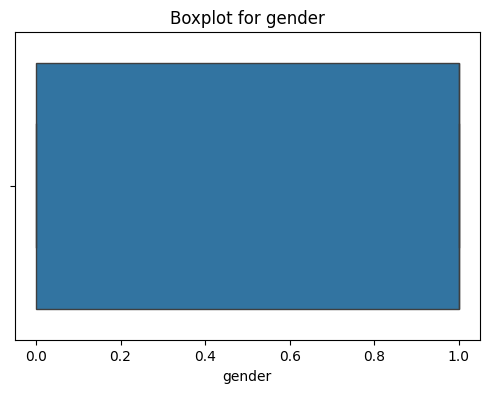

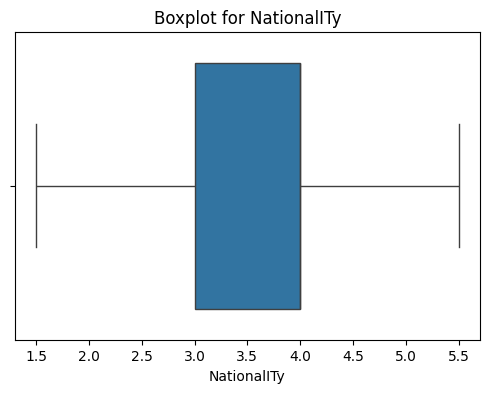

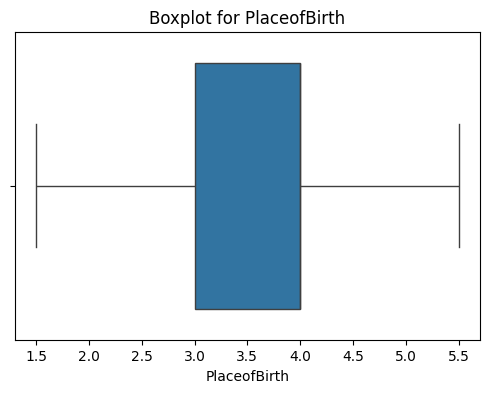

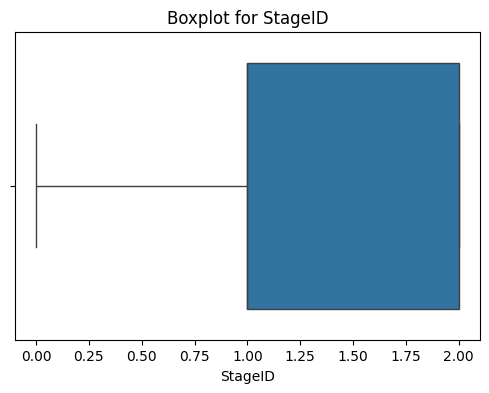

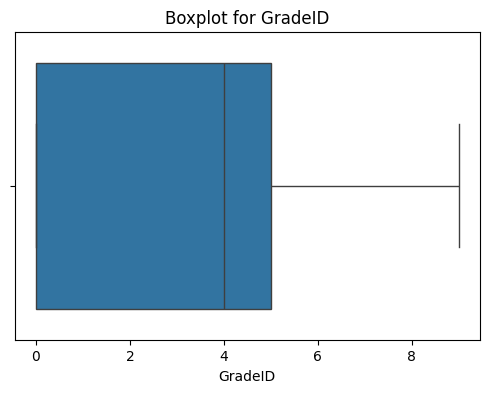

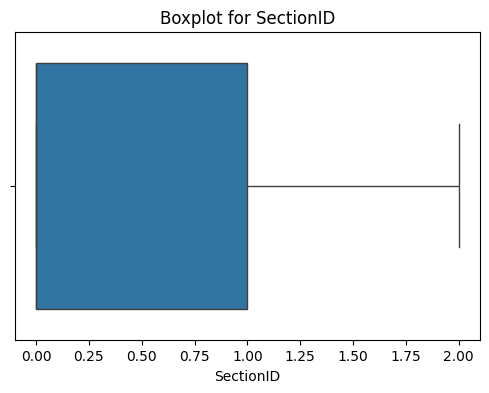

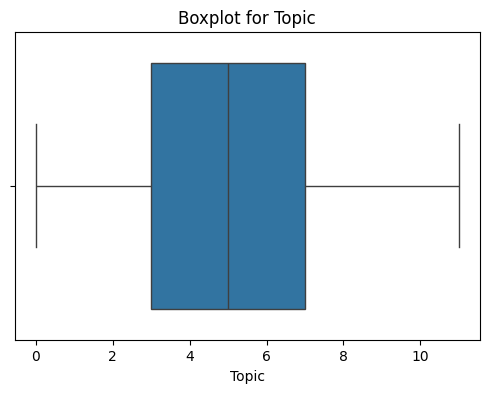

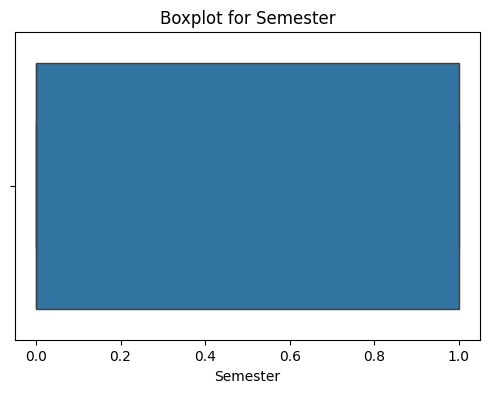

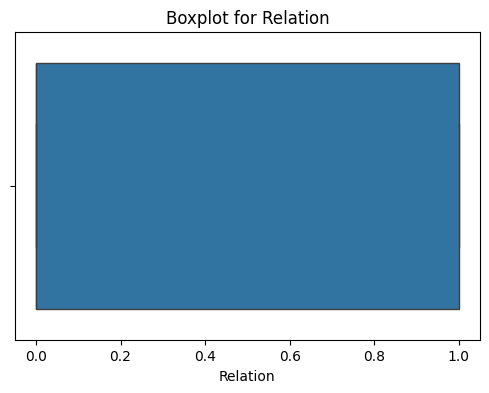

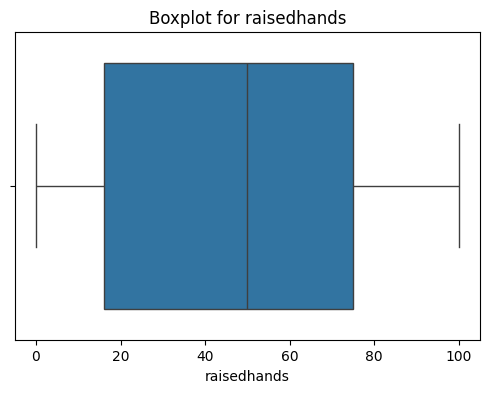

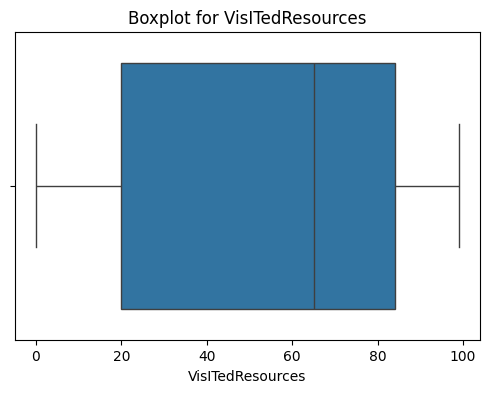

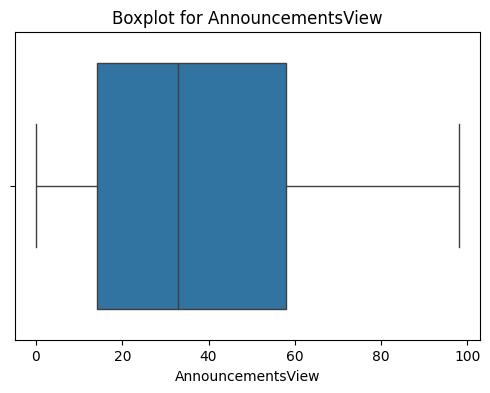

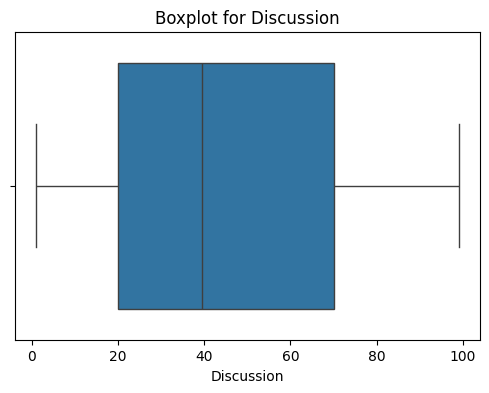

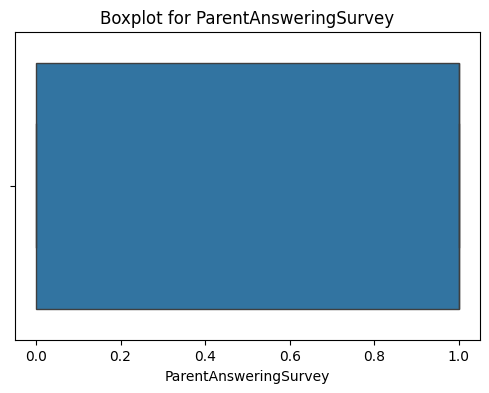

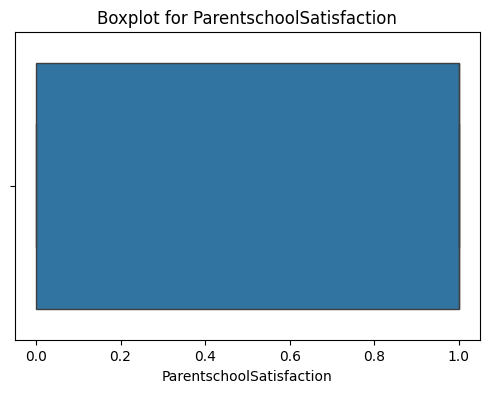

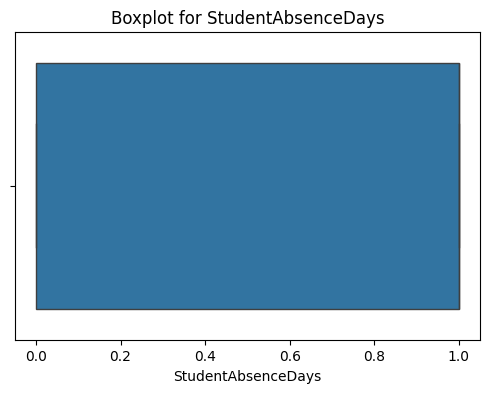

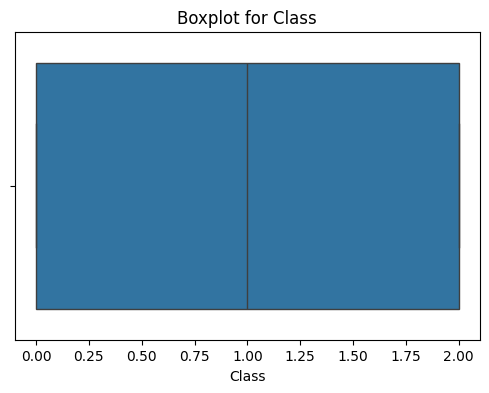

In [15]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting dataset

In [16]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']


# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modeling

In [17]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42,learning_rate=0.3)
}


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 88.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.90      0.96      0.93        27
           2       0.93      0.82      0.87        45

    accuracy                           0.89        96
   macro avg       0.88      0.90      0.89        96
weighted avg       0.89      0.89      0.88        96

Logistic Regression Accuracy: 83.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.83      0.89      0.86        27
           2       0.87      0.76      0.81        45

    accuracy                           0.83        96
   macro avg       0.83      0.85      0.84        96
weighted avg       0.84      0.83      0.83        96

SVM Accuracy: 85.42%

Classification Report:
              precision    recall  f1-score   support

           

In [18]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each classifier
param_grids = {
    'Random Forest Classifier': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Naive Bayes': {},
    'Decision Tree': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.1, 0.3, 0.5]
    }
}

# Loop through each classifier and apply GridSearchCV
for name, clf in classifiers.items():
    print(f"Training {name} with hyperparameter tuning...")
    
    # Get the appropriate parameter grid
    param_grid = param_grids.get(name, {})
    
    # If the classifier has parameters to tune, perform GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        
        # Get the best model and evaluate
        best_clf = grid_search.best_estimator_
        y_pred = best_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Best Accuracy: {accuracy * 100:.2f}% with best params: {grid_search.best_params_}')
    else:
        # If no hyperparameters to tune, just fit the model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    

Training Random Forest Classifier with hyperparameter tuning...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Random Forest Classifier Best Accuracy: 82.29% with best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Training Logistic Regression with hyperparameter tuning...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression Best Accuracy: 83.33% with best params: {'C': 10, 'solver': 'saga'}
Training SVM with hyperparameter tuning...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM Best Accuracy: 83.33% with best params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Training KNN with hyperparameter tuning...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNN Best Accuracy: 79.17% with best params: {'n_neighbors': 9, 'weights': 'distance'}
Training Naive Bayes with hyperparameter tuning...
Naive Bayes Accuracy: 80.21%
Training Decision Tree with hyperparameter tuning...
Fitting 5 folds for eac

In [19]:
#END